# Brief EDA

In [56]:
from torchvision import transforms

from motion_detection.dataset import CustomDataset
import matplotlib.pyplot as plt
import numpy as np

In [53]:
def plot_images(dataset, indices, transform_=lambda x: x):
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    images, labels = dataset[indices]
    for i, (img, label) in enumerate(zip(images, labels)):
        img = transform_(img).permute(1, 2, 0).numpy()
        ax[i // 5, i % 5].imshow(img)
        ax[i // 5, i % 5].set_title(label)
        
def get_counts(dataset):
    n_ones = dataset[:][1].sum()
    n_zeros = len(dataset) - n_ones
    return n_ones, n_zeros

def plot_labels_distribution(dataset):
    n_ones, n_zeros = get_counts(dataset)
    plt.bar(range(2), (n_zeros, n_ones), align='center')
    plt.xticks(range(2))
    plt.title('Labels distribution')
    plt.show()


In [44]:
train_dataset = CustomDataset('../data/train', '../data')
val_dataset = CustomDataset('../data/test', '../data')

In [45]:
random_indices = np.random.choice(len(train_dataset), 10)

Original images:

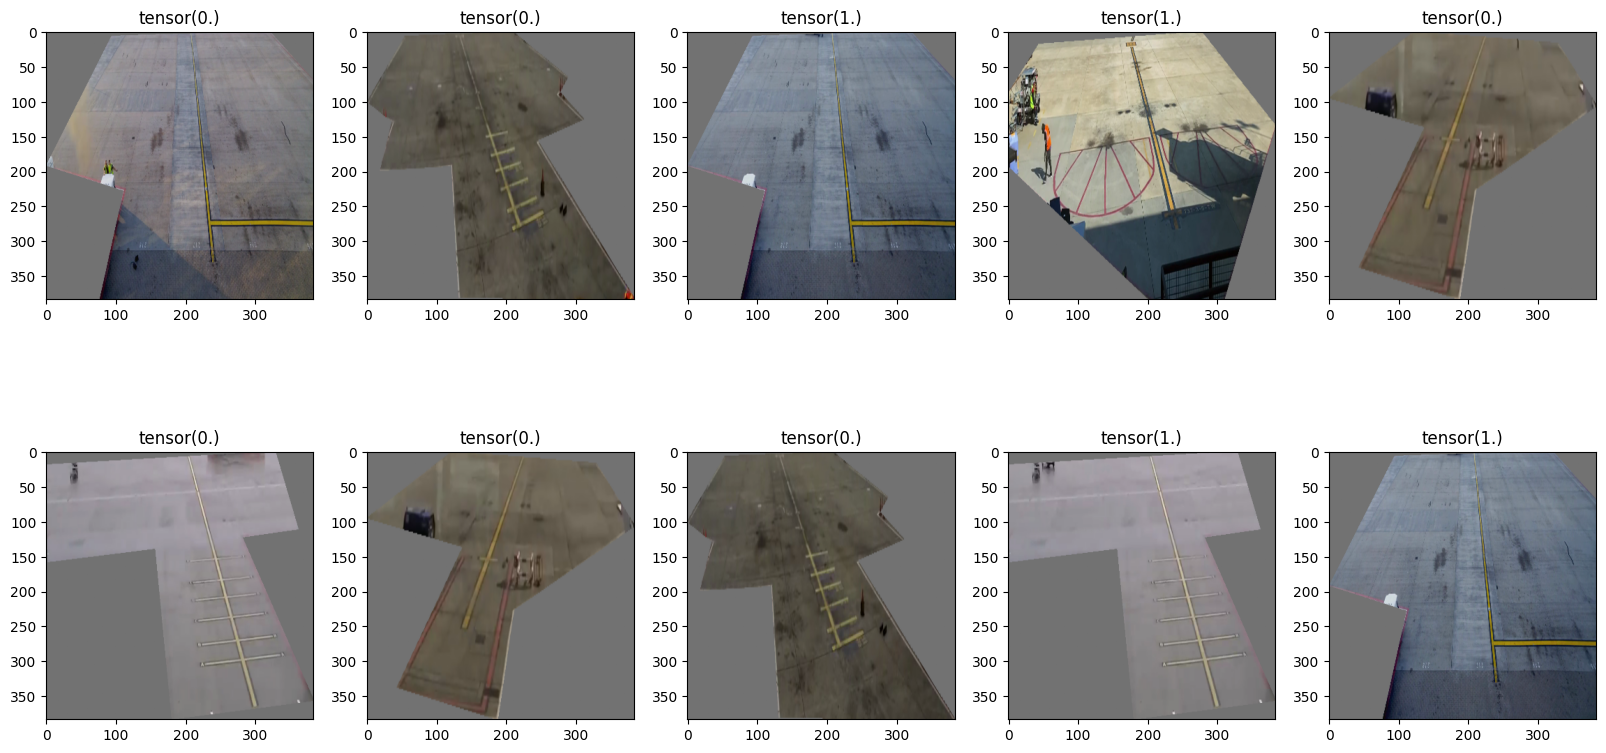

In [46]:
plot_images(train_dataset, random_indices)

Augmented images using transforms for training (except for normalization for visualization purposes):

In [51]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(degrees=70, translate=(0.3, 0.3), scale=(0.5, 1.5)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    # EfficientNet_V2_S_Weights.IMAGENET1K_V1.transforms(),
])

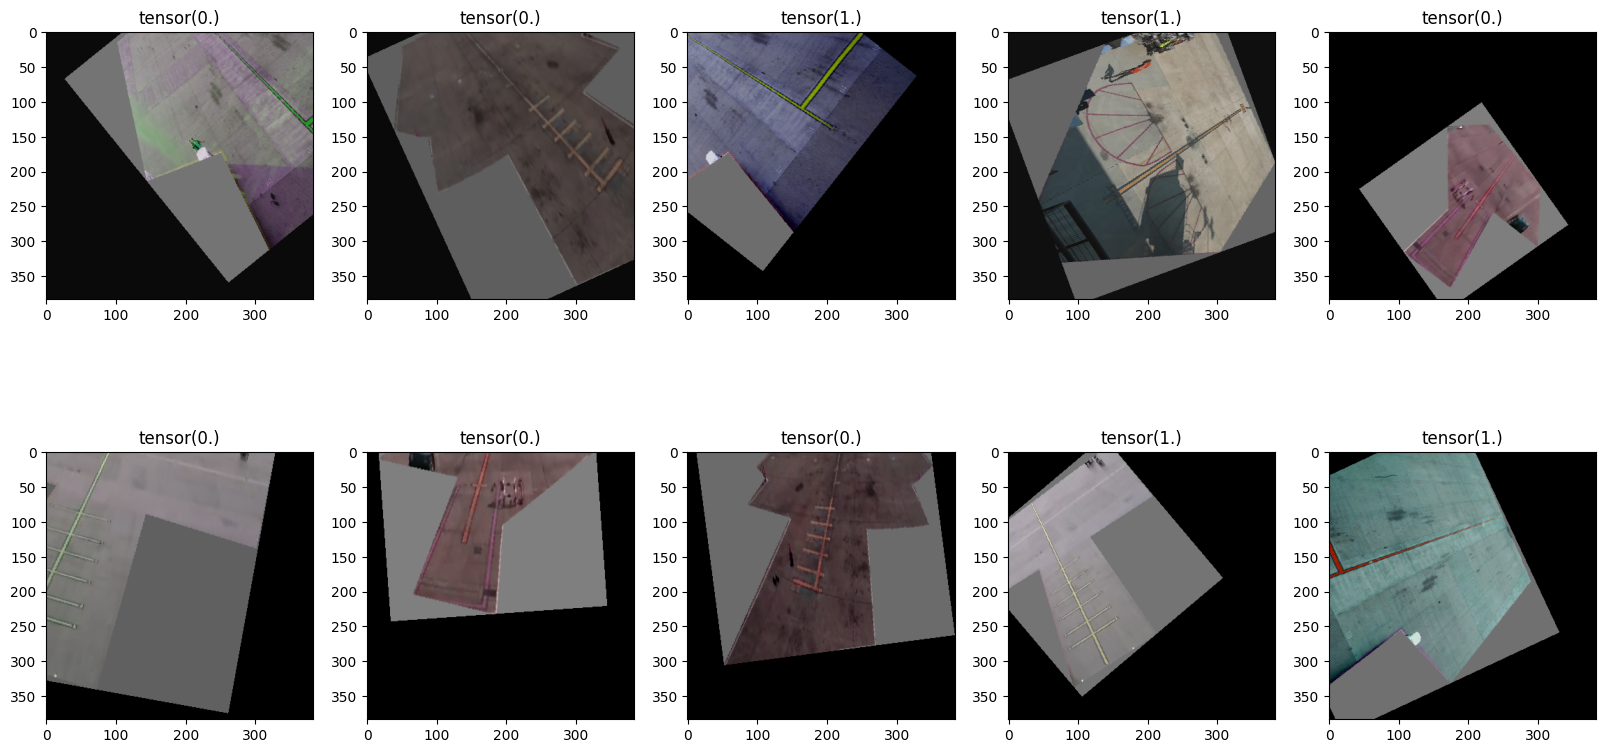

In [52]:
plot_images(train_dataset, random_indices, transform)

Both training and validation sets are roughly balanced, so we have no need for under/over-sampling (or applying other techniques).

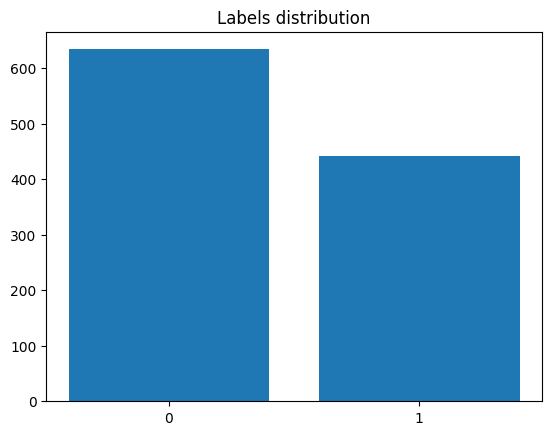

In [54]:
plot_labels_distribution(train_dataset)

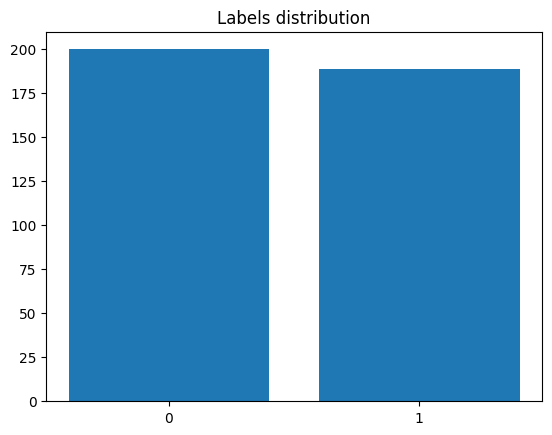

In [55]:
plot_labels_distribution(val_dataset)